* Q1 How many transactions in the dataset?
* Q2 What is the top-3 most expensive item in the database?
show the price of items.
* Q3 Show number of customers were born in each month.
there are 12 months
* Q4 Show top-3 popular items that make most income.
show the total income of each item.
* Q5 A manager want to crate a birth-month promotion in January 2017.
How many customers were born in January and also made transcations in January 2017?
* Q6 In January, what were the top-3 favorite items that customer bought with "Bread"?
show number of times

In [1]:
import sqlite3
import pandas as pd

con = sqlite3.connect('db.sqlite3')
df_customer = pd.read_sql_query("SELECT * from myapp_customer", con)
df_transaction = pd.read_sql_query("SELECT * from myapp_transaction", con)
df_record = pd.read_sql_query("SELECT * from myapp_record", con)
df_item = pd.read_sql_query("SELECT * from myapp_item", con)
con.close()
df_customer.head()

,id,firstname,lastname,dob
0,1,David,Smith,1940-04-10
1,2,Claire,Taylor,1977-06-14
2,3,Oliver,Evans,1949-11-09
3,4,Jack,Davies,1949-09-15
4,5,James,Johnson,1974-06-11


In [2]:
#Q1
df_transaction.count()

id             9531
customer_id    9531
datetime       9531
dtype: int64

In [3]:
#Q2
df_item.sort_values(by='price', ascending=False).head(3)

,id,name,price
31,32,My-5 Fruit Shoot,400
42,43,Empanadas,400
6,7,Jam,400


In [4]:
#Q3 Show number of customers were born in each month. there are 12 months
type(df_customer.dob[0])

str

In [5]:
con = sqlite3.connect('db.sqlite3')
df_customer = pd.read_sql_query(
    sql="SELECT * from myapp_customer",
    con=con,
    parse_dates={'dob':'%Y-%m-%d'}
)
con.close()

In [6]:
type(df_customer.dob[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df_customer['month']=df_customer.dob.dt.month
df_customer.head()

,id,firstname,lastname,dob,month
0,1,David,Smith,1940-04-10,4
1,2,Claire,Taylor,1977-06-14,6
2,3,Oliver,Evans,1949-11-09,11
3,4,Jack,Davies,1949-09-15,9
4,5,James,Johnson,1974-06-11,6


In [8]:
df_customer.groupby(by='month').agg({'id':['min','max','sum','count','mean']})

id                            
      min  max   sum count       mean
month                                
1      14  116  1108    17  65.176471
2      21  118   451     7  64.428571
3      30   69   315     6  52.500000
4       1  109   555    10  55.500000
5      16   89   335     6  55.833333
6       2  119   685    12  57.083333
7       9  104   589    11  53.545455
8       6  105   796    12  66.333333
9       4  120   818    14  58.428571
10     40  114   696     9  77.333333
11      3  115   534     9  59.333333
12      8  117   378     7  54.000000

In [9]:
#Q4 Show top-3 popular items that make most income. show the total income of each item.

In [22]:
df_item.merge(df_record,left_on='id',right_on='item_id')\
    .groupby('name')\
    .agg({
        'price':['sum','count','mean'],
        #'transaction_id':['sum','count','mean'],
        })\
    .sort_values(('price','sum'),ascending=False)\
    .head(3)

price           
            sum count mean
name                      
Coffee  2133690  5471  390
Bread   1130160  3324  340
Tea      559650  1435  390

In [17]:
#Q5 A manager want to crate a birth-month promotion in January 2017.
#How many customers were born in January and also made transcations in January 2017?

price           
                sum count mean
name                          
Apple           120     2   60
Banana          150     3   50
Bacon           230     1  230
Adjustment      290     1  290
The BART        310     1  310
...             ...   ...  ...
Pastry       214000   856  250
NONE         282960   786  360
Tea          559650  1435  390
Bread       1130160  3324  340
Coffee      2133690  5471  390

[98 rows x 3 columns]

In [26]:
con = sqlite3.connect('db.sqlite3')
df_customer = pd.read_sql_query(
    sql="SELECT * from myapp_customer",
    con=con,
    parse_dates={'dob':'%Y-%m-%d'}
)
df_transaction = pd.read_sql_query(
    sql="SELECT * from myapp_transaction",
    con=con,
    parse_dates={'datetime':'%Y-%m-%d'}
)
con.close()

In [52]:
#Q5 A manager want to crate a birth-month promotion in January 2017.
#How many customers were born in January and also made transcations in January 2017?
df1=df_customer[df_customer.dob.dt.month==1]
df2=df_transaction[
    (df_transaction.datetime.dt.month==1) & (df_transaction.datetime.dt.year==2017)
]
df1.merge(df2, left_on='id', right_on='customer_id')\
    .groupby(['id_x','firstname','lastname'])\
    .agg({'id_y':['count']})\
    .count()

id_y  count    17
dtype: int64

In [11]:
#left
df_item.head()

,id,name,price
0,1,Banana,50
1,2,Apple,60
2,3,Cherries,200
3,4,Bread,340
4,5,Scandinavian,370


In [12]:
#right
df_record.head()

,id,item_id,transaction_id
0,1,1,1
1,2,1,1
2,3,2,1
3,4,3,2
4,5,2,2


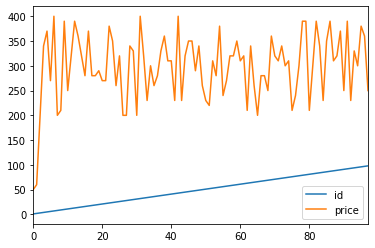

In [57]:
df_item.plot()

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

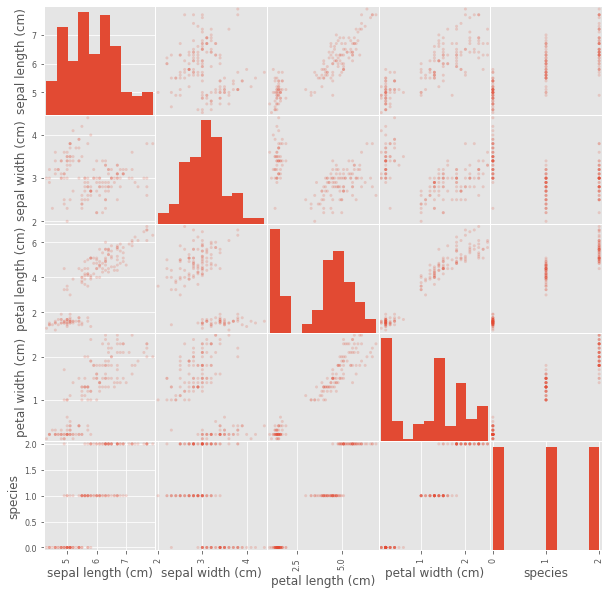

In [71]:
# Load some data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

pd.plotting.scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
plt.show()

In [70]:
pd.plotting.scatter_matrix(iris)

AttributeError: _get_numeric_data